In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 1. Dataset

- `Age` age of the patient [years]
- `Sex` sex of the patient [M: Male, F: Female]
- `ChestPainType` chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- `RestingBP` resting blood pressure [mm Hg]
- `Cholesterol` serum cholesterol [mm/dl]
- `FastingBS` fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- `RestingECG` resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- `MaxHR` maximum heart rate achieved [Numeric value between 60 and 202]
- `ExerciseAngina` exercise-induced angina [Y: Yes, N: No]
- `Oldpeak` oldpeak = ST [Numeric value measured in depression]
- `ST_Slope` the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- `HeartDisease` output class [1: heart disease, 0: Normal]

In [2]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [5]:
cat_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns = cat_variables, prefix = cat_variables)
df.shape

(918, 21)

In [6]:
X = df.drop('HeartDisease', axis=1)
Y = df.HeartDisease

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, train_size = 0.8, random_state=32)
X_train.shape, X_val.shape

((734, 20), (184, 20))

In [8]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([336, 398], dtype=int64))

# 2.1 Decision Tree
There are several hyperparameters in the Decision Tree object from Scikit-learn. We will use only some of them
 - `min_samples_split`: The minimum number of samples required to split an internal node. 
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
 - `max_depth`: The maximum depth of the tree. 
   - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

Text(0.5, 1.0, 'Train x Validation metrics')

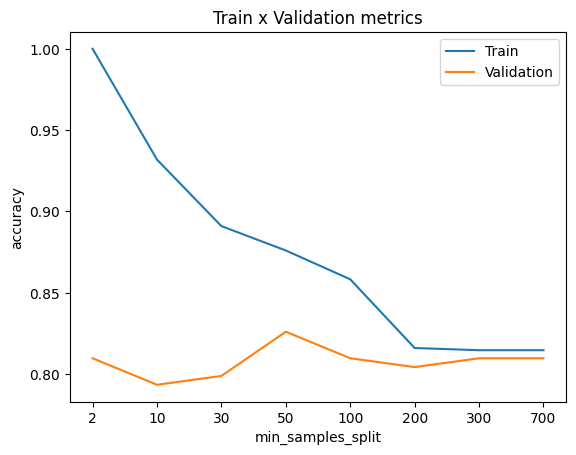

In [9]:
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]

accuracy_list_train = []
accuracy_list_val = []
for i in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=i, random_state=42).fit(X_train, y_train)
    
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

# PLOT
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

plt.legend(['Train', 'Validation'])
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.title('Train x Validation metrics')

Text(0.5, 1.0, 'Train x Validation metrics')

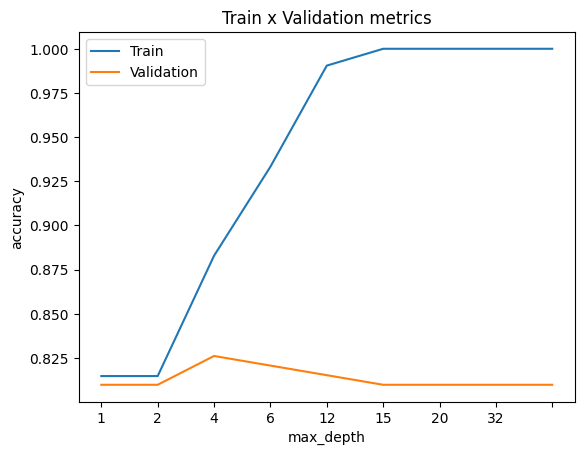

In [10]:
max_depth_list = [1, 2, 4, 6, 12, 15, 20, 32, None]

accuracy_list_train = []
accuracy_list_val = []
for i in max_depth_list:
    model = DecisionTreeClassifier(max_depth=i, random_state=42).fit(X_train, y_train) 
    
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val)
    
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

# PLOT
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

plt.legend(['Train', 'Validation'])
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Train x Validation metrics')

So we can choose the best values for these two hyper-parameters for our model to be:
- `max_depth = 4`
- `min_samples_split = 50` 

In [11]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 4,
                                             random_state=42)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=42)

In [12]:
decision_tree_model.score(X_train, y_train)

0.8760217983651226

In [13]:
decision_tree_model.score(X_val, y_val)

0.8315217391304348

# 2.2 Random Forest

Text(0.5, 1.0, 'Train x Validation metrics')

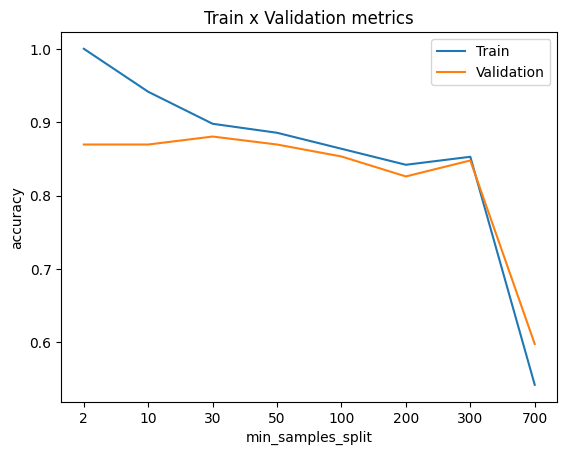

In [14]:
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]

accuracy_list_train = []
accuracy_list_val = []
for i in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=i, random_state=42).fit(X_train, y_train)
    
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

# PLOT
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

plt.legend(['Train', 'Validation'])
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.title('Train x Validation metrics')

Text(0.5, 1.0, 'Train x Validation metrics')

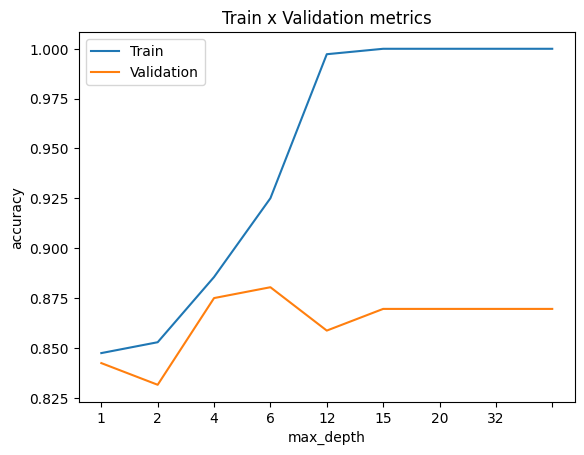

In [15]:
max_depth_list = [1, 2, 4, 6, 12, 15, 20, 32, None]

accuracy_list_train = []
accuracy_list_val = []
for i in max_depth_list:
    model = RandomForestClassifier(max_depth=i, random_state=42).fit(X_train, y_train) 
    
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val)
    
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

# PLOT
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

plt.legend(['Train', 'Validation'])
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Train x Validation metrics')

Text(0.5, 1.0, 'Train x Validation metrics')

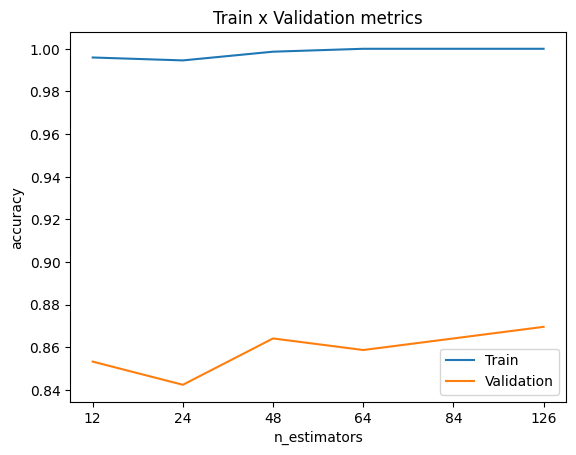

In [16]:
n_estimators_list = [12, 24, 48, 64, 84, 126]

accuracy_list_train = []
accuracy_list_val = []
for i in n_estimators_list:
    model = RandomForestClassifier(n_estimators=i, random_state=42).fit(X_train, y_train) 
    
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

# PLOT
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

plt.legend(['Train', 'Validation'])
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Train x Validation metrics')

In [17]:
random_forest_model = RandomForestClassifier(n_estimators=126,
                                             max_depth=6, 
                                             min_samples_split=30)
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=30, n_estimators=126)

In [18]:
random_forest_model.score(X_train, y_train)

0.8923705722070845

In [19]:
random_forest_model.score(X_val, y_val)

0.875

# 2.3 XGBoost

Next is the Gradient Boosting model, called XGBoost. The boosting methods train several trees, but instead of them being uncorrelated to each other, now the trees are fit one after the other in order to minimize the error. 

The model has the same parameters as a decision tree, plus the learning rate.
- The learning rate is the size of the step on the Gradient Descent method that the XGBoost uses internally to minimize the error on each train step.

One interesting thing about the XGBoost is that during fitting, it can take in an evaluation dataset of the form `(X_val,y_val)`.
- On each iteration, it measures the cost (or evaluation metric) on the evaluation datasets.
- Once the cost (or metric) stops decreasing for a number of rounds (called early_stopping_rounds), the training will stop. 
- More iterations lead to more estimators, and more estimators can result in overfitting.  
- By stopping once the validation metric no longer improves, we can limit the number of estimators created, and reduce overfitting.

First, let's define a subset of our training set (we should not use the test set here).

In [23]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [24]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

We can then set a large number of estimators, because we can stop if the cost function stops decreasing.

Note some of the `.fit()` parameters:
- `eval_set = [(X_train_eval,y_train_eval)]`:Here we must pass a list to the eval_set, because you can have several different tuples ov eval sets. 
- `early_stopping_rounds`: This parameter helps to stop the model training if its evaluation metric is no longer improving on the validation set. It's set to 10.
  - The model keeps track of the round with the best performance (lowest evaluation metric).  For example, let's say round 16 has the lowest evaluation metric so far.
  - Each successive round's evaluation metric is compared to the best metric.  If the model goes 10 rounds where none have a better metric than the best one, then the model stops training.
  - The model is returned at its last state when training terminated, not its state during the best round.  For example, if the model stops at round 26, but the best round was 16, the model's training state at round 26 is returned, not round 16.
  - Note that this is different from returning the model's "best" state (from when the evaluation metric was the lowest).

In [28]:
xgb_model = XGBClassifier(n_estimators=500, 
                          learning_rate=0.1, 
                          verbosity=1, 
                          early_stopping_rounds=10,
                          random_state=42)

xgb_model.fit(
    X_train_fit, 
    y_train_fit, 
    eval_set=[(X_train_eval, y_train_eval)], 
)

[0]	validation_0-logloss:0.63736
[1]	validation_0-logloss:0.59104
[2]	validation_0-logloss:0.55225
[3]	validation_0-logloss:0.52184
[4]	validation_0-logloss:0.49565
[5]	validation_0-logloss:0.47429
[6]	validation_0-logloss:0.45571
[7]	validation_0-logloss:0.43963
[8]	validation_0-logloss:0.42804
[9]	validation_0-logloss:0.41560
[10]	validation_0-logloss:0.40539
[11]	validation_0-logloss:0.39470
[12]	validation_0-logloss:0.38608
[13]	validation_0-logloss:0.37474
[14]	validation_0-logloss:0.36828
[15]	validation_0-logloss:0.36052
[16]	validation_0-logloss:0.35518
[17]	validation_0-logloss:0.34978
[18]	validation_0-logloss:0.34528
[19]	validation_0-logloss:0.33985
[20]	validation_0-logloss:0.33614
[21]	validation_0-logloss:0.33414
[22]	validation_0-logloss:0.33190
[23]	validation_0-logloss:0.33189
[24]	validation_0-logloss:0.32983
[25]	validation_0-logloss:0.32938
[26]	validation_0-logloss:0.32558
[27]	validation_0-logloss:0.32399
[28]	validation_0-logloss:0.32372
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Even though we initialized the model to allow up to 500 estimators, the algorithm only fit 26 estimators (over 26 rounds of training).

To see why, let's look for the round of training that had the best performance (lowest evaluation metric).  You can either view the validation log loss metrics that were output above, or view the model's `.best_iteration` attribute:

In [29]:
xgb_model.best_iteration

34

The best round of training was round 16, with a log loss of 4.3948.  
- For 10 rounds of training after that (from round 17 to 26), the log loss was higher than this.
- Since we set `early_stopping_rounds` to 10, then by the 10th round where the log loss doesn't improve upon the best one, training stops.
- You can try out different values of `early_stopping_rounds` to verify this.  If you set it to 20, for instance, the model stops training at round 36 (16 + 20).

In [31]:
xgb_model.score(X_train, y_train)

0.9536784741144414

In [32]:
xgb_model.score(X_val, y_val)

0.8695652173913043